In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_excel('bank.xlsx', header = 0)

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,month
0,59,admin.,married,secondary,no,2343,yes,no,may
1,56,admin.,married,secondary,no,45,no,no,may
2,41,technician,married,secondary,no,1270,yes,no,may
3,55,services,married,secondary,no,2476,yes,no,may
4,54,admin.,married,tertiary,no,184,no,no,may


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   month      11162 non-null  object
dtypes: int64(2), object(7)
memory usage: 785.0+ KB


In [71]:
df = pd.get_dummies(df, columns = ["job", "marital", "education", "default", "housing", "loan", "month"], drop_first = False)

In [72]:
df.head()

,age,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,2343,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,56,45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41,1270,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,55,2476,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,54,184,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
X = df.loc[:, df.columns!="balance"]
type(X)

pandas.core.frame.DataFrame

In [41]:
X.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,55,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
y=df["balance"]
type(y)

pandas.core.series.Series

In [43]:
y.head()

0    2343
1      45
2    1270
3    2476
4     184
Name: balance, dtype: int64

In [44]:
y.shape

(11162,)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
X_train.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
6111,49,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1149,59,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2954,33,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2458,58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7504,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
X_train.shape

(8929, 31)

In [49]:
X_test.shape

(2233, 31)

In [50]:
from sklearn import tree
regtree= tree.DecisionTreeRegressor(max_depth=3)

In [51]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [52]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)


In [53]:
y_test_pred

array([1398.70621753, 2005.42746781,  637.89256198, ..., 2247.59      ,
       1398.70621753, 1398.70621753])

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
mean_squared_error(y_test, y_test_pred)

11783920.41510999

In [56]:
r2_score(y_train, y_train_pred)

0.03326056357405971

In [57]:
r2_score(y_test,y_test_pred)

0.009825143481038245

In [64]:
dot_data = tree.export_graphviz(regtree, out_file=None, feature_names=X_train.columns, filled= True)

In [87]:
pip install IPython

In [59]:
from IPython.display import Image

In [60]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [61]:
import pydotplus

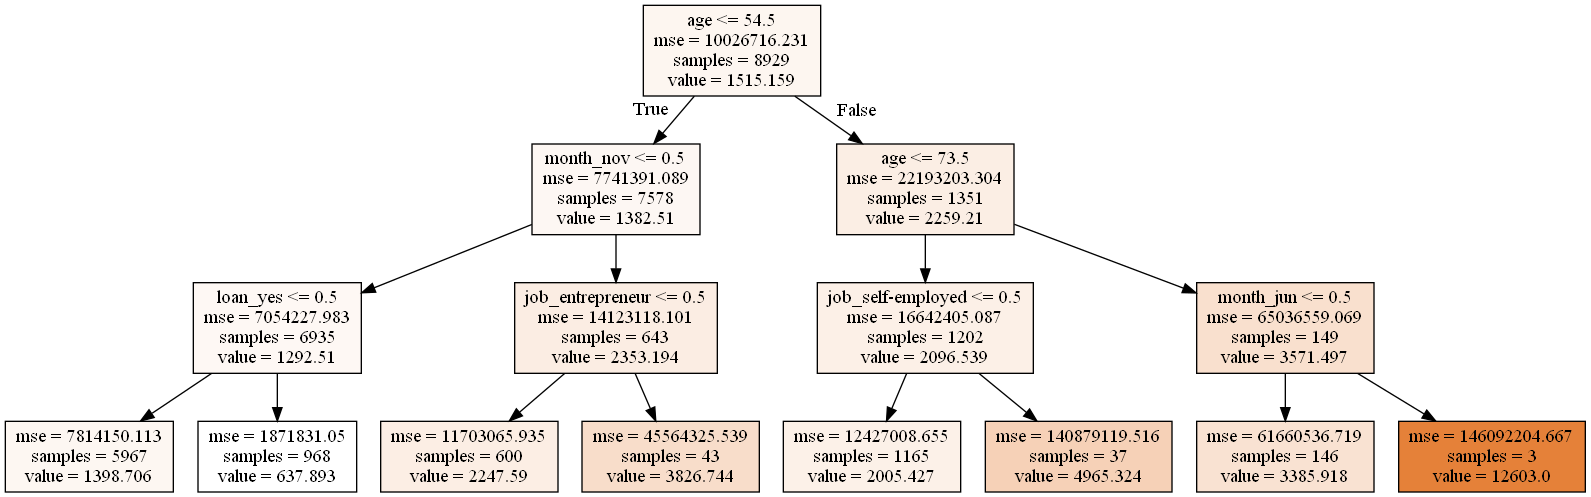

In [65]:
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 
